<a href="https://colab.research.google.com/gist/andreped/274bf953771059fd9537877404369bed/lynos-load-dataset-example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install -q datasets nibabel

In [13]:
from datasets import load_dataset

# downloads data from Zenodo through the Hugging Face hub
# - might take several minutes (~5 minutes in CoLab)
# - when finished "num_rows" attribute should say '27', which is #CTs in dataset
dataset = load_dataset("andreped/LyNoS")
print(dataset)

data is downloaded to: /root/.cache/huggingface/datasets/downloads/extracted/25432ffc15a3650a47da3d9223aeead84213a3aa1e5b23bbe6b40eec124e7c2c/Benchmark


Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    test: Dataset({
        features: ['ct', 'lymphnodes', 'azygos', 'brachiocephalicveins', 'esophagus', 'subclaviancarotidarteries'],
        num_rows: 15
    })
})


In [34]:
# get paths of features (ct/airways/lungs) for a single patient
curr = dataset["test"][0]
print(curr)
print(curr["ct"])
print(curr["lymphnodes"])
print(curr["azygos"])
print(curr["brachiocephalicveins"])
print(curr["esophagus"])
print(curr["subclaviancarotidarteries"])

{'ct': '/root/.cache/huggingface/datasets/downloads/extracted/25432ffc15a3650a47da3d9223aeead84213a3aa1e5b23bbe6b40eec124e7c2c/Benchmark/Pat2/pat2_data.nii.gz', 'lymphnodes': '/root/.cache/huggingface/datasets/downloads/extracted/25432ffc15a3650a47da3d9223aeead84213a3aa1e5b23bbe6b40eec124e7c2c/Benchmark/Pat2/pat2_labels_LymphNodes.nii.gz', 'azygos': '/root/.cache/huggingface/datasets/downloads/extracted/25432ffc15a3650a47da3d9223aeead84213a3aa1e5b23bbe6b40eec124e7c2c/Benchmark/Pat2/pat2_labels_Azygos.nii.gz', 'brachiocephalicveins': '/root/.cache/huggingface/datasets/downloads/extracted/25432ffc15a3650a47da3d9223aeead84213a3aa1e5b23bbe6b40eec124e7c2c/Benchmark/Pat2/pat2_labels_BrachiocephalicVeins.nii.gz', 'esophagus': '/root/.cache/huggingface/datasets/downloads/extracted/25432ffc15a3650a47da3d9223aeead84213a3aa1e5b23bbe6b40eec124e7c2c/Benchmark/Pat2/pat2_labels_Esophagus.nii.gz', 'subclaviancarotidarteries': '/root/.cache/huggingface/datasets/downloads/extracted/25432ffc15a3650a47da3

In [16]:
# list all available patients and corresponding features (ct/airways/lungs)
for d in dataset["test"]:
  print(d)

{'ct': '/root/.cache/huggingface/datasets/downloads/extracted/25432ffc15a3650a47da3d9223aeead84213a3aa1e5b23bbe6b40eec124e7c2c/Benchmark/Pat2/pat2_data.nii.gz', 'lymphnodes': '/root/.cache/huggingface/datasets/downloads/extracted/25432ffc15a3650a47da3d9223aeead84213a3aa1e5b23bbe6b40eec124e7c2c/Benchmark/Pat2/pat2_labels_LymphNodes.nii.gz', 'azygos': '/root/.cache/huggingface/datasets/downloads/extracted/25432ffc15a3650a47da3d9223aeead84213a3aa1e5b23bbe6b40eec124e7c2c/Benchmark/Pat2/pat2_labels_Azygos.nii.gz', 'brachiocephalicveins': '/root/.cache/huggingface/datasets/downloads/extracted/25432ffc15a3650a47da3d9223aeead84213a3aa1e5b23bbe6b40eec124e7c2c/Benchmark/Pat2/pat2_labels_BrachiocephalicVeins.nii.gz', 'esophagus': '/root/.cache/huggingface/datasets/downloads/extracted/25432ffc15a3650a47da3d9223aeead84213a3aa1e5b23bbe6b40eec124e7c2c/Benchmark/Pat2/pat2_labels_Esophagus.nii.gz', 'subclaviancarotidarteries': '/root/.cache/huggingface/datasets/downloads/extracted/25432ffc15a3650a47da3

CT: (353, 353, 358) int32
Lymph Nodes: (353, 353, 358) uint8
Azygos: (353, 353, 358) uint8


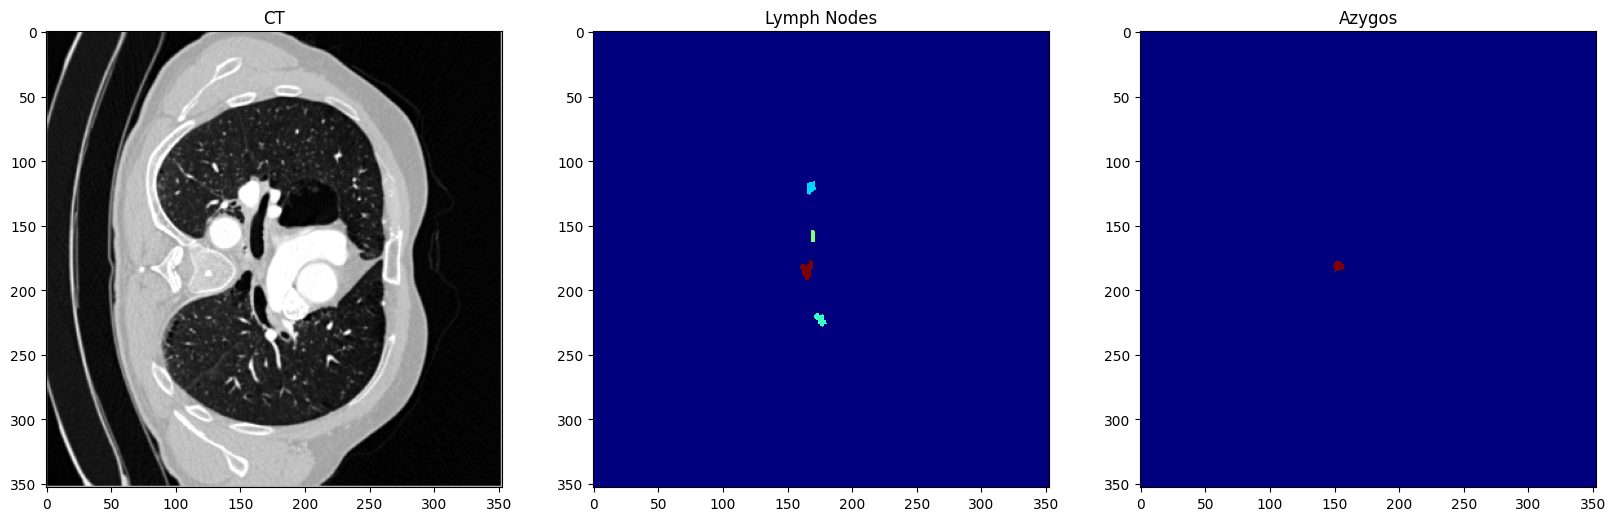

In [33]:
import nibabel as nib
import matplotlib.pyplot as plt

from nibabel.processing import resample_to_output

# load CT, airways, and lungs to numpy arrays for one patient
patient_1 = dataset["test"][0]
slice_nr = 205

ct_image = nib.load(patient_1["ct"])
ct_image = resample_to_output(ct_image, order=1)
ct_data = ct_image.get_fdata().astype("int32")

print("CT:", ct_data.shape, ct_data.dtype)

airways_image = nib.load(patient_1["lymphnodes"])
airways_image = resample_to_output(airways_image, order=0)
airways_data = airways_image.get_fdata().astype("uint8")

print("Lymph Nodes:", airways_data.shape, airways_data.dtype)

azygos_image = nib.load(patient_1["azygos"])
azygos_image = resample_to_output(azygos_image, order=0)
azygos_data = azygos_image.get_fdata().astype("uint8")

print("Azygos:", azygos_data.shape, azygos_data.dtype)

# HU-clip CT for better contrast
ct_data[ct_data < -1024] = -1024
ct_data[ct_data > 400] = 400

# plot corresponding CT, Airways, and Lungs for a single 2D slide side-by-side
fig, ax = plt.subplots(1, 3, figsize=(20, 12))
ax[0].imshow(ct_data[..., slice_nr], cmap="gray")
ax[1].imshow(airways_data[..., slice_nr], cmap="jet", interpolation="none")
ax[2].imshow(azygos_data[..., slice_nr], cmap="jet", interpolation="none")

for i, title in enumerate(["CT", "Lymph Nodes", "Azygos"]):
  ax[i].set_title(title)
plt.show()